**Introduction**

This EDA looks at the Prostate Cancer data. I use seaborn for plotting.Prostate cancer is cancer that occurs in the prostate — a small walnut-shaped gland in men that produces the seminal fluid that nourishes and transports sperm.Usually prostate cancer grows slowly and is initially confined to the prostate gland, where it may not cause serious harm. However, while some types of prostate cancer grow slowly and may need minimal or even no treatment, other types are aggressive and can spread quickly.

**Symptoms**

Prostate cancer may cause no signs or symptoms in its early stages.

Prostate cancer that's more advanced may cause signs and symptoms such as:

* Trouble urinating
* Decreased force in the stream of urine
* Blood in semen
* Discomfort in the pelvic area
* Bone pain
* Erectile dysfunction




In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import tree
import seaborn as sns
from sklearn import neighbors, model_selection,metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/prostate-cancer/Prostate_Cancer.csv


**Reading File and Deleting the Unique Columns**

In [2]:
inputPath = "/kaggle/input/prostate-cancer/Prostate_Cancer.csv"
df = pd.read_csv(inputPath)
#Deleting the unique column
del df['id']
#First 10 Records
df.head(10)

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,M,23,12,151,954,0.143,0.278,0.242,0.079
1,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,M,14,16,78,386,0.070,0.284,0.260,0.097
4,M,9,19,135,1297,0.141,0.133,0.181,0.059
5,B,25,25,83,477,0.128,0.170,0.209,0.076
6,M,16,26,120,1040,0.095,0.109,0.179,0.057
7,M,15,18,90,578,0.119,0.165,0.220,0.075
8,M,19,24,88,520,0.127,0.193,0.235,0.074
9,M,25,11,84,476,0.119,0.240,0.203,0.082


**Diagnosis Result Chart**

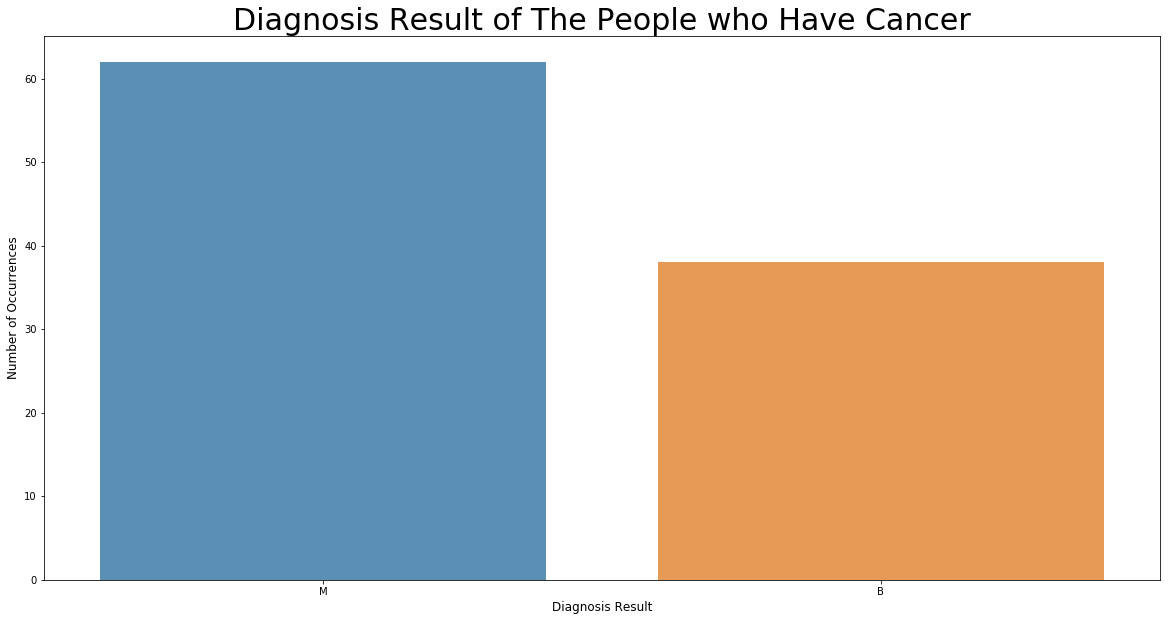

In [3]:
# 2. What types of crimes are most common?
OFFENSE_CODE_GROUP = df['diagnosis_result'].value_counts(sort = True)
plt.figure(figsize=(20,10))
sns.barplot(OFFENSE_CODE_GROUP.index, OFFENSE_CODE_GROUP.values, alpha=0.8)
plt.title('Diagnosis Result of The People who Have Cancer', fontsize=30)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Diagnosis Result', fontsize=12)
plt.show()

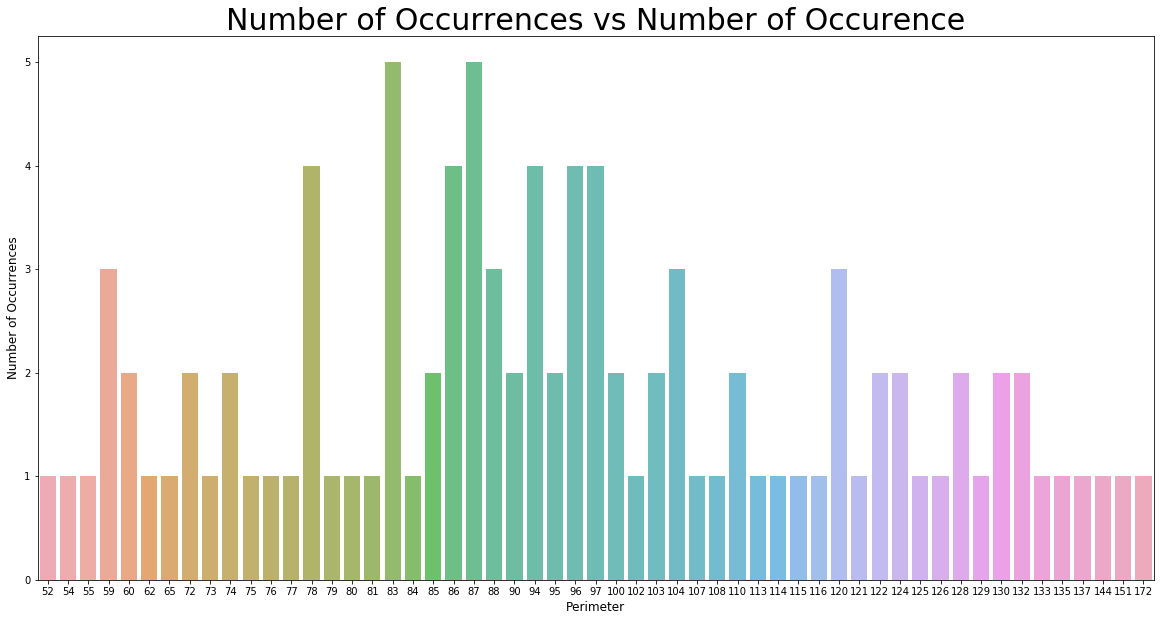

In [4]:
# 2. What types of crimes are most common?
OFFENSE_CODE_GROUP = df['perimeter'].value_counts(sort = True)
plt.figure(figsize=(20,10))
sns.barplot(OFFENSE_CODE_GROUP.index, OFFENSE_CODE_GROUP.values, alpha=0.8)
plt.title('Number of Occurrences vs Number of Occurence', fontsize=30)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Perimeter', fontsize=12)
plt.show()

In [5]:
#Making and Splitting The Training and Test Data
df['compactness'].fillna(df['compactness'].mean(),inplace=True)
df['fractal_dimension'].fillna(df['fractal_dimension'].mean(),inplace=True)
X = np.c_[df['radius'], df['texture'], df['perimeter'], df['area'], df['smoothness'], df['compactness'], df['symmetry'], df['fractal_dimension']]
y = df['diagnosis_result']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0, stratify = y)


**k-Neighbors-Classifier**

In [6]:
#Using KNN For Prediction
n_neighbors = 15
kNeighborsClassifier = neighbors.KNeighborsClassifier(n_neighbors)
kNeighborsClassifier.fit(X_train, y_train)
cancerPrediction = kNeighborsClassifier.predict(X_test)
# How did our model perform?
count_misclassified = (y_test != cancerPrediction).sum()
print('kNeighborsClassifier Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, cancerPrediction)
print('kNeighborsClassifier Accuracy: {:.2f}'.format(accuracy))

kNeighborsClassifier Misclassified samples: 4
kNeighborsClassifier Accuracy: 0.87


**Decision Tree Classifier**

In [7]:
#Using Decision Tree For Prediction
decisionTreeClassifier = tree.DecisionTreeClassifier()
decisionTreeClassifier.fit(X_train, y_train)
cancerPrediction = decisionTreeClassifier.predict(X_test)
# How did our model perform?
count_misclassified = (y_test != cancerPrediction).sum()
print('DecisionTreeClassifier Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, cancerPrediction)
print('DecisionTreeClassifier Accuracy: {:.2f}'.format(accuracy))

DecisionTreeClassifier Misclassified samples: 6
DecisionTreeClassifier Accuracy: 0.80


In [8]:
#Using Gauian Naive Bayes For Prediction
naiveBayesClassifier = GaussianNB()
naiveBayesClassifier.fit(X_train, y_train)
cancerPrediction = naiveBayesClassifier.predict(X_test)
# How did our model perform?
count_misclassified = (y_test != cancerPrediction).sum()
print('NaiveBayesClassifier Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, cancerPrediction)
print('NaiveBayesClassifier Accuracy: {:.2f}'.format(accuracy))

NaiveBayesClassifier Misclassified samples: 4
NaiveBayesClassifier Accuracy: 0.87
